# Portfolio 2
by ***Hoang Van Le* - prepared for COMP2200 Data Science**


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error #,mean_absolute_percentage_error 
#np.sqrt(mean_square_error()) to return Root Mean Squared Error (RMSE)

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
train = pd.read_csv('data/training.csv', index_col='date', parse_dates=True)
print(train.shape)
train.head()

(14803, 31)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,45.730000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


In [3]:
test = pd.read_csv('data/testing.csv', index_col='date', parse_dates=True)
print(test.shape)
test.head()

(4932, 31)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,45.723333,...,733.800000,92.000000,6.000000,51.5,5.000000,45.410389,45.410389,63000,Weekday,Monday
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,45.790000,...,734.100000,92.000000,5.000000,40.0,4.700000,47.233763,47.233763,64800,Weekday,Monday
2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,46.430000,...,734.366667,91.333333,5.666667,40.0,4.633333,10.298729,10.298729,67200,Weekday,Monday
2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,46.430000,...,734.433333,91.166667,5.833333,40.0,4.616667,8.827838,8.827838,67800,Weekday,Monday
2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,48.490000,...,734.850000,89.500000,6.000000,40.0,4.350000,24.884962,24.884962,70200,Weekday,Monday


In [4]:
test.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus', 'Day_of_week'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14803 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   14803 non-null  int64  
 1   lights       14803 non-null  int64  
 2   T1           14803 non-null  float64
 3   RH_1         14803 non-null  float64
 4   T2           14803 non-null  float64
 5   RH_2         14803 non-null  float64
 6   T3           14803 non-null  float64
 7   RH_3         14803 non-null  float64
 8   T4           14803 non-null  float64
 9   RH_4         14803 non-null  float64
 10  T5           14803 non-null  float64
 11  RH_5         14803 non-null  float64
 12  T6           14803 non-null  float64
 13  RH_6         14803 non-null  float64
 14  T7           14803 non-null  float64
 15  RH_7         14803 non-null  float64
 16  T8           14803 non-null  float64
 17  RH_8         14803 non-null  float64
 18  T9         

In [6]:
train.isna().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
NSM            0
WeekStatus     0
Day_of_week    0
dtype: int64

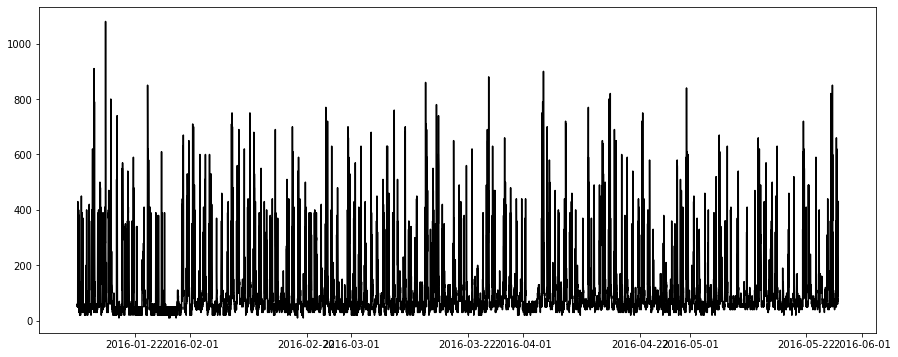

In [7]:
plt.figure(figsize=(15,6))
plt.plot(train.index, train['Appliances'], c = (0,0,0))
#use seaborn pairGrid for the bottm corner: scatter plot, diagonal: histogram, upper corner: correlation matrix

In [8]:
from datetime import *
d1 = train.first_valid_index()
delta = timedelta(days=7)
d2 = d1 + delta
print(d2)

2016-01-18 17:00:00


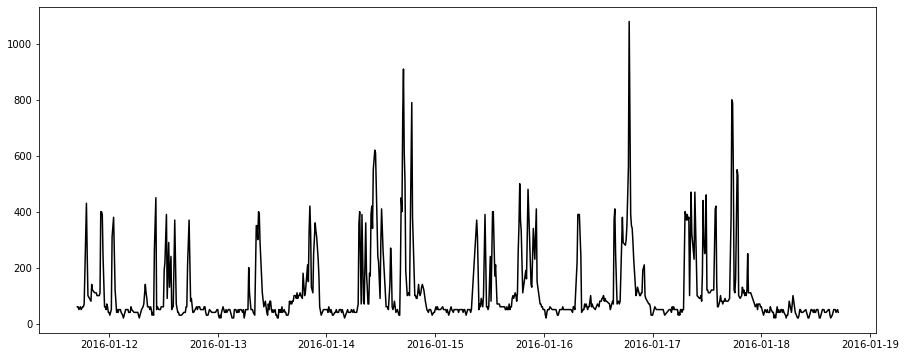

In [9]:
plt.figure(figsize=(15,6))
plt.plot(train[train.index <= d2].index, train[train.index <= d2]['Appliances'], c = (0,0,0))

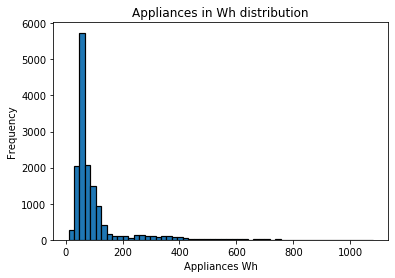

In [10]:
plt.hist(train.Appliances, bins = 56, edgecolor='black', linewidth=1.2)
plt.rcParams["figure.figsize"] = [20,10]
plt.title("Appliances in Wh distribution")
plt.xlabel("Appliances Wh")
plt.ylabel("Frequency")
plt.show()

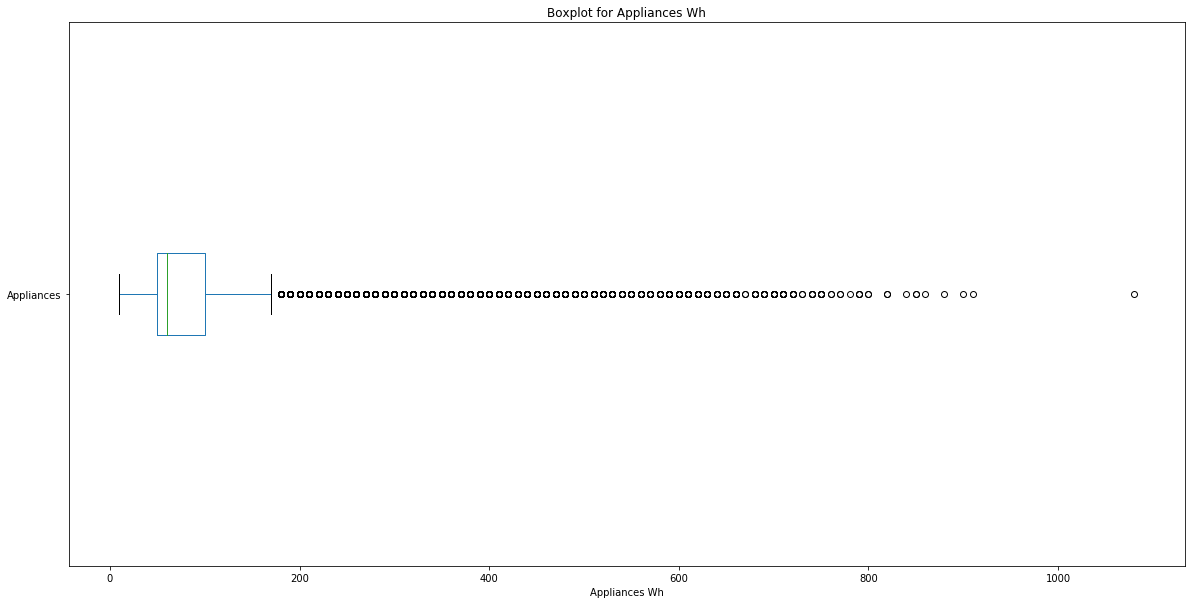

In [11]:
train.Appliances.plot.box(vert=False)
plt.rcParams["figure.figsize"] = [20,10]
plt.xlabel('Appliances Wh')
plt.title("Boxplot for Appliances Wh")
plt.show()

The histogram and the boxplot show that the distribution is highly skewed to the right and there are many outliers.

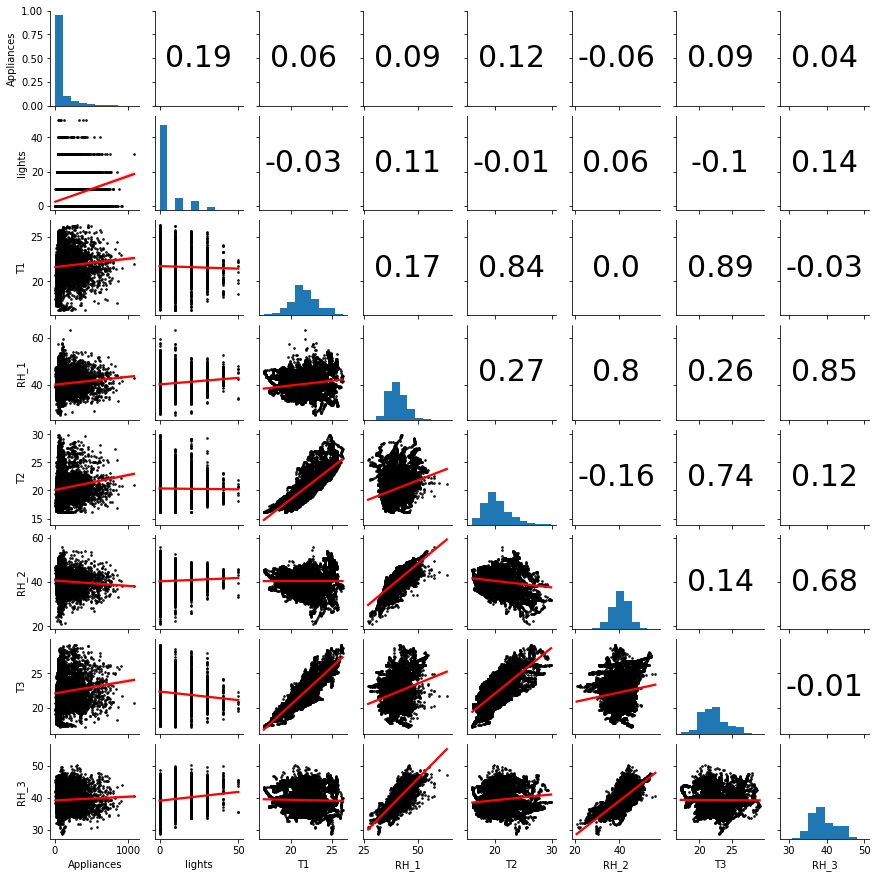

In [12]:
#first
from scipy import stats

def first_pearson(x,y,**kws):
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0,1],2)
    ax = plt.gca()
    ax.annotate(pearson, [.5,.5], xycoords = "axes fraction", ha = "center", va='center', fontsize = 30)
    
scatterdata = train[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']]

s = sns.PairGrid(scatterdata, height =1.5)
s = s.map_diag(plt.hist)
s = s.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
s = s.map_upper(first_pearson)

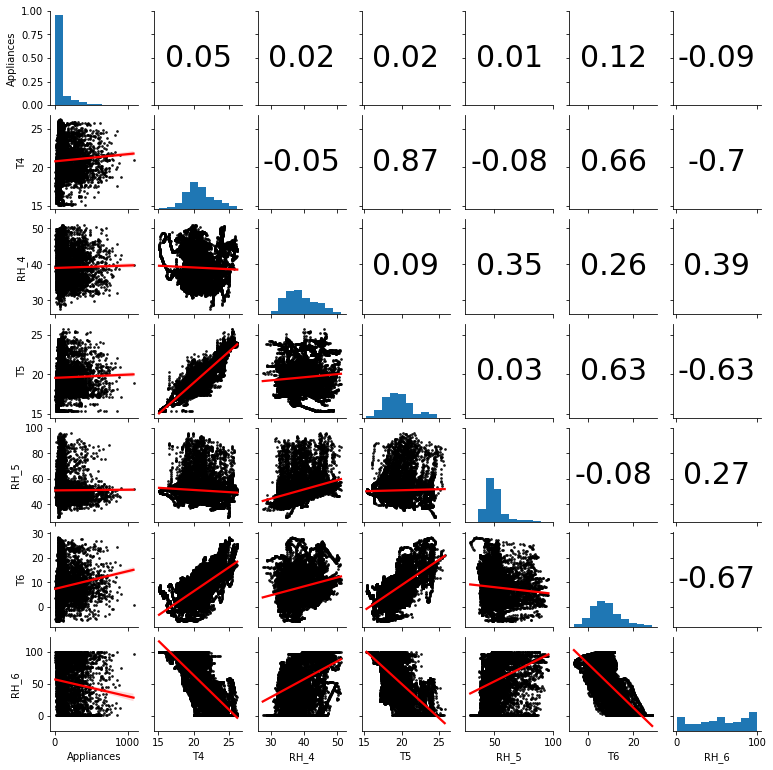

In [13]:
#second
scatterdata = train[['Appliances', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6']]

s = sns.PairGrid(scatterdata, height =1.5)
s = s.map_diag(plt.hist)
s = s.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
s = s.map_upper(first_pearson)

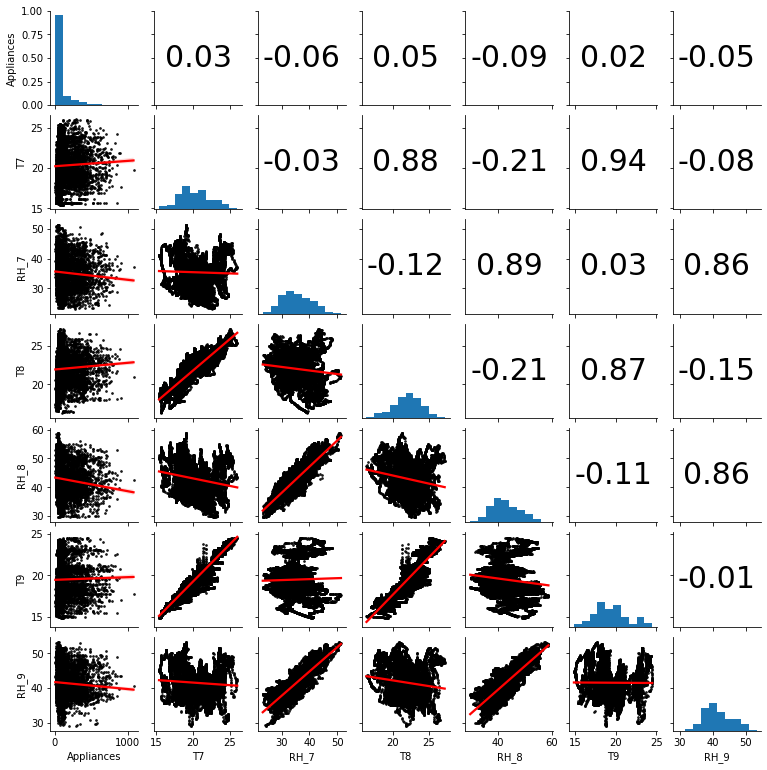

In [14]:
#third
scatterdata = train[['Appliances', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9']]

s = sns.PairGrid(scatterdata, height =1.5)
s = s.map_diag(plt.hist)
s = s.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
s = s.map_upper(first_pearson)

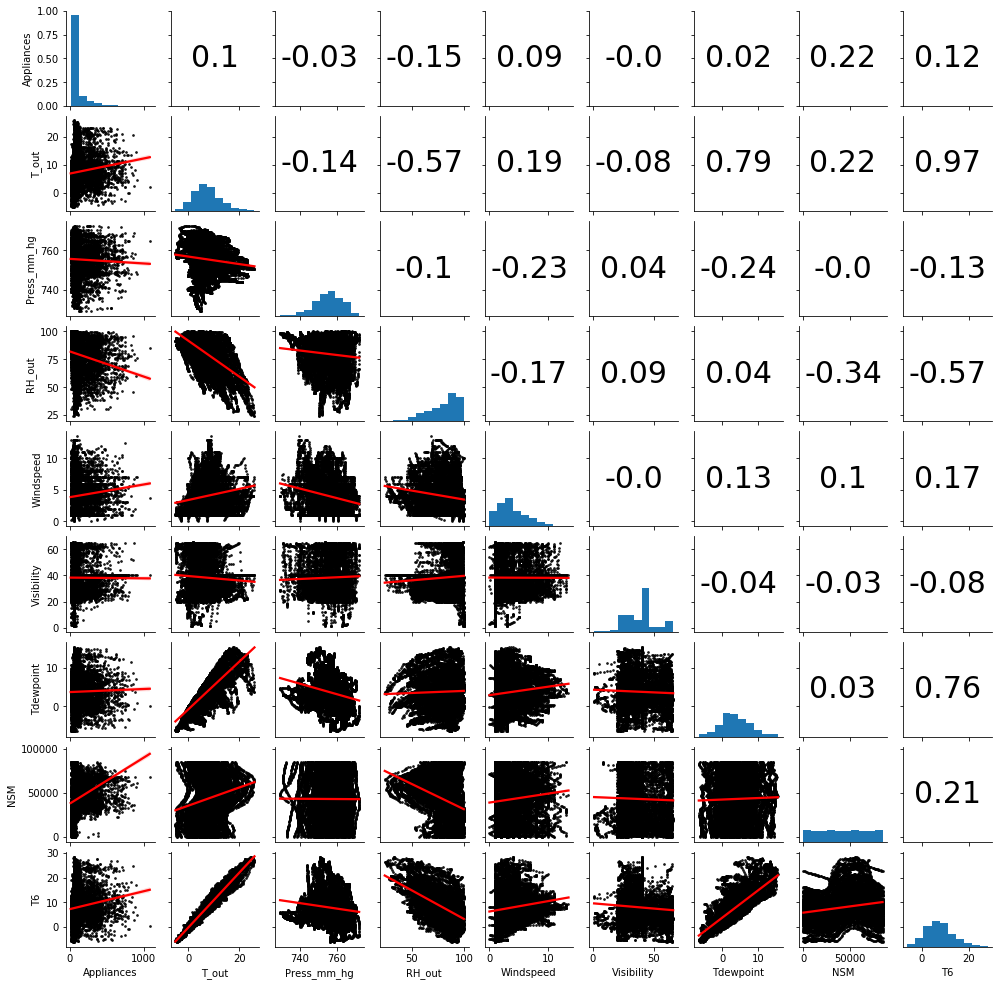

In [15]:
#fourth
scatterdata = train[['Appliances', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility','Tdewpoint','NSM','T6']]

s = sns.PairGrid(scatterdata, height =1.5)
s = s.map_diag(plt.hist)
s = s.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
s = s.map_upper(first_pearson)

In [16]:
#X_train = train.drop(['Appliances', 'WeekStatus', 'Day_of_week'], axis = 1)
#axis = 1 means dropping the columns, date is the index in my dataset
#droping the last two columns because they are categocial variables
# train[['Appliances']].shape[1] returns 1 => is it a list?
# but with one pair [], it wil be (rows,) <= nothing in the columns

y_train = train[['Appliances']]
X_train = train.loc[:,'lights':'NSM']
y_test = test[['Appliances']]
X_test = test.loc[:,'lights':'NSM']
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(14803, 28) (14803, 1) (4932, 28) (4932, 1)


In [17]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

# Evaluate the performance of your trained model
print("On training set: ")
print("R squared: ", r2_score(y_train, y_hat_train))
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_hat_train)))
print("MAE: ", mean_absolute_error(y_train, y_hat_train))
print("MAPE: ", mean_absolute_percentage_error(y_train, y_hat_train))

print()
print("On testing set: ")
print("R squared: ", r2_score(y_test, y_hat_test))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_hat_test)))
print("MAE: ", mean_absolute_error(y_test, y_hat_test))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_hat_test))

On training set: 
R squared:  0.17188056846730493
RMSE:  93.57143468503801
MAE:  53.255031292957206
MAPE:  Appliances    61.494124
dtype: float64

On testing set: 
R squared:  0.15199183390308568
RMSE:  93.56425120887656
MAE:  52.075015316595916
MAPE:  Appliances    60.104751
dtype: float64


In [19]:
print(set(train['WeekStatus']), set(train['Day_of_week']))

{'Weekday', 'Weekend'} {'Thursday', 'Saturday', 'Friday', 'Monday', 'Sunday', 'Wednesday', 'Tuesday'}


In [20]:
#creating dummies variables
weekstatus_train = pd.get_dummies(train['WeekStatus'])
weekstatus_test = pd.get_dummies(test['WeekStatus'])
print(weekstatus_train.shape, weekstatus_test.shape)

(14803, 2) (4932, 2)


In [21]:
#joining the above extra two columns to the X train and test sets
X_train1 = X_train.join(weekstatus_train)
X_test1 = X_test.join(weekstatus_test)
print(X_train1.shape, X_test1.shape)

(14803, 30) (4932, 30)


In [22]:
model1 = LinearRegression()
model1.fit(X_train1, y_train)

y_hat_train = model1.predict(X_train1)
y_hat_test = model1.predict(X_test1)

# Evaluate the performance of your trained model
print("On training set: ")
print("R squared: ", r2_score(y_train, y_hat_train))
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_hat_train)))
print("MAE: ", mean_absolute_error(y_train, y_hat_train))
print("MAPE: ", mean_absolute_percentage_error(y_train, y_hat_train))

print()
print("On testing set: ")
print("R squared: ", r2_score(y_test, y_hat_test))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_hat_test)))
print("MAE: ", mean_absolute_error(y_test, y_hat_test))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_hat_test))

On training set: 
R squared:  0.17319357453646622
RMSE:  93.49722522017885
MAE:  53.25049400657291
MAPE:  Appliances    61.412394
dtype: float64

On testing set: 
R squared:  0.15187319300446978
RMSE:  93.57079605069303
MAE:  52.071370261615684
MAPE:  Appliances    60.026453
dtype: float64


In [23]:
#creating dummies variables for Day_of_week
train_day_of_week = pd.get_dummies(train['Day_of_week'])
test_day_of_week = pd.get_dummies(test['Day_of_week'])
print(train_day_of_week.shape, test_day_of_week.shape)

(14803, 7) (4932, 7)


In [24]:
#joining the new 7 columns with the existing X train and test sets
X_train2 = X_train1.join(train_day_of_week)
X_test2 = X_test1.join(test_day_of_week)
print(X_train2.shape, X_test2.shape)

(14803, 37) (4932, 37)


In [25]:
model2 = LinearRegression()
model2.fit(X_train2, y_train)

y_hat_train = model2.predict(X_train2)
y_hat_test = model2.predict(X_test2)

# Evaluate the performance of your trained model
print("On training set: ")
print("R squared: ", r2_score(y_train, y_hat_train))
print("RMSE: ", np.sqrt(mean_squared_error(y_train, y_hat_train)))
print("MAE: ", mean_absolute_error(y_train, y_hat_train))
print("MAPE: ", mean_absolute_percentage_error(y_train, y_hat_train))

print()
print("On testing set: ")
print("R squared: ", r2_score(y_test, y_hat_test))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_hat_test)))
print("MAE: ", mean_absolute_error(y_test, y_hat_test))
print("MAPE: ", mean_absolute_percentage_error(y_test, y_hat_test))

On training set: 
R squared:  0.17834376492372528
RMSE:  93.20557248110671
MAE:  53.138912335056055
MAPE:  Appliances    61.331175
dtype: float64

On testing set: 
R squared:  0.15900712778675063
RMSE:  93.17643426587763
MAE:  51.98492960938431
MAPE:  Appliances    59.955126
dtype: float64


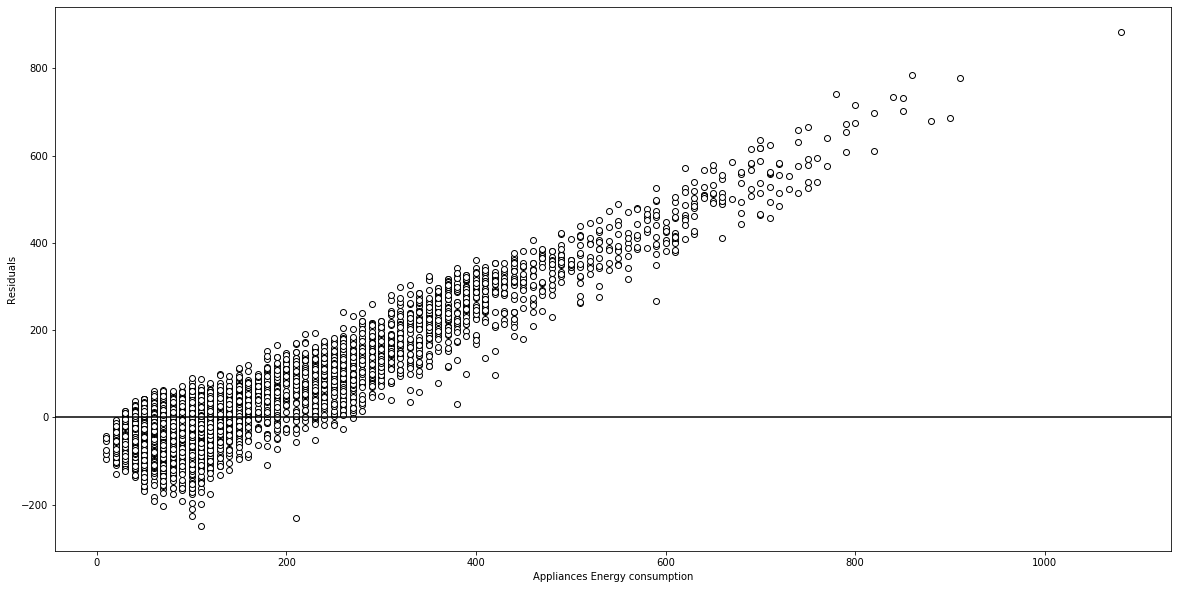

In [26]:
residual = y_train - y_hat_train
plt.scatter(y_train,residual,color="white", edgecolor='black')
plt.xlabel('Appliances Energy consumption')
plt.ylabel('Residuals')
plt.axhline(0, color='black')

There is obvious pattern in the residuals suggesting that the model is not a good fit.

In [27]:
from sklearn.feature_selection import RFE

In [28]:
import warnings
warnings.filterwarnings('ignore')

#on the last model, X_train2, X_test2, y_train and y_test
estimator = LinearRegression()
rmse_scores = []
for i in range(1,38):
    selector = RFE(estimator, n_features_to_select=i, step=1)
    selector = selector.fit(X_train2, y_train)
    y_test_pred = selector.predict(X_test2)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE score on test set using", i, "featuers: ", rmse_test)
    rmse_scores.append(rmse_test)

RMSE score on test set using 1 featuers:  101.26888895164174
RMSE score on test set using 2 featuers:  99.12399407311727
RMSE score on test set using 3 featuers:  98.92249989546323
RMSE score on test set using 4 featuers:  97.97137950937748
RMSE score on test set using 5 featuers:  97.87877773888789
RMSE score on test set using 6 featuers:  97.79879832642703
RMSE score on test set using 7 featuers:  97.54264516067863
RMSE score on test set using 8 featuers:  97.4383034495254
RMSE score on test set using 9 featuers:  96.97841033120521
RMSE score on test set using 10 featuers:  95.04617607469439
RMSE score on test set using 11 featuers:  95.02193708768031
RMSE score on test set using 12 featuers:  94.9073006369462
RMSE score on test set using 13 featuers:  94.68863860202238
RMSE score on test set using 14 featuers:  94.70687758710378
RMSE score on test set using 15 featuers:  94.68431856934916
RMSE score on test set using 16 featuers:  94.69881903708233
RMSE score on test set using 17 fe

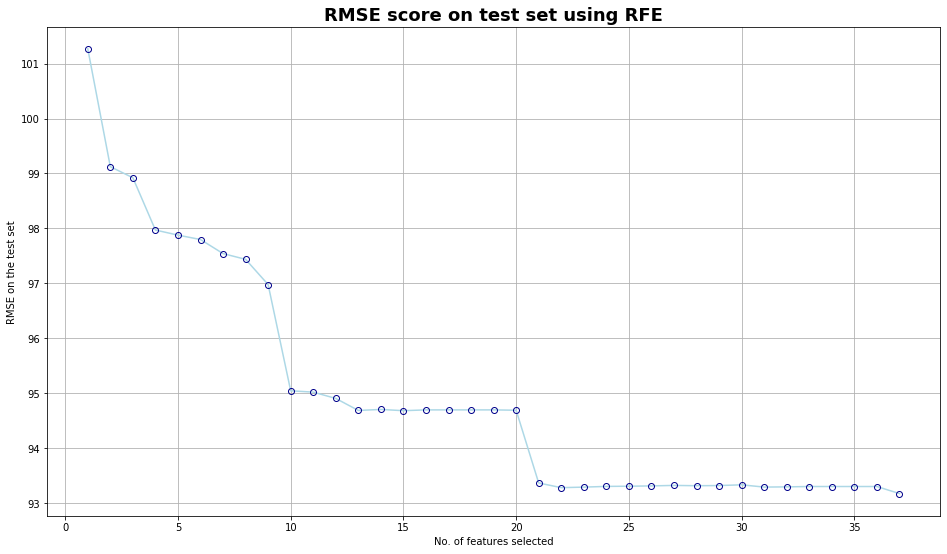

In [29]:
plt.figure(figsize=(16,9))
plt.grid()   
plt.xlabel('No. of features selected')
plt.ylabel('RMSE on the test set')
plt.title('RMSE score on test set using RFE', fontsize=18, fontweight='bold')
plt.plot(range(1, 38), rmse_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'DarkBlue', markerfacecolor = 'None')
plt.show()

In [30]:
train_hr = train['Appliances'].resample('H').sum()
train_hr.head()

date
2016-01-11 17:00:00    280
2016-01-11 18:00:00    190
2016-01-11 19:00:00    870
2016-01-11 20:00:00    450
2016-01-11 21:00:00    520
Freq: H, Name: Appliances, dtype: int64

In [31]:
from pandas import DataFrame
train_hr = DataFrame(train_hr)
train_hr.head()

,Appliances
date,
2016-01-11 17:00:00,280
2016-01-11 18:00:00,190
2016-01-11 19:00:00,870
2016-01-11 20:00:00,450
2016-01-11 21:00:00,520


In [32]:
time = train_hr.index.hour
time

Int64Index([17, 18, 19, 20, 21, 22, 23,  0,  1,  2,
            ...
             9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
           dtype='int64', name='date', length=3290)

In [33]:
day = pd.to_datetime([d.date() for d in train_hr.index])
dayname = day.day_name()
dayname

Index(['Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Tuesday', 'Tuesday', 'Tuesday',
       ...
       'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday'],
      dtype='object', length=3290)

In [34]:
train_hr['Day Of Week'] = dayname
train_hr['hour of day'] = time
train_hr.head(15)

,Appliances,Day Of Week,hour of day
date,,,
2016-01-11 17:00:00,280,Monday,17
2016-01-11 18:00:00,190,Monday,18
2016-01-11 19:00:00,870,Monday,19
2016-01-11 20:00:00,450,Monday,20
2016-01-11 21:00:00,520,Monday,21
2016-01-11 22:00:00,1540,Monday,22
2016-01-11 23:00:00,340,Monday,23
2016-01-12 00:00:00,470,Tuesday,0
2016-01-12 01:00:00,590,Tuesday,1


In [35]:
first = train_hr.first_valid_index()
start = first - timedelta(days=first.weekday())
end = start + timedelta(days=6)
end = end.replace(hour=0)
print(end)

2016-01-17 00:00:00


The start of the first complete week in the dataset is indicated above. It is also the start of the first heatmap.

In [36]:
start1=end
end1=start1 + timedelta(days=7, hours = -1)
data1 = train_hr[(train_hr.index>=start1) & (train_hr.index<=end1)]
data1

,Appliances,Day Of Week,hour of day
date,,,
2016-01-17 00:00:00,180,Sunday,0
2016-01-17 01:00:00,250,Sunday,1
2016-01-17 02:00:00,120,Sunday,2
2016-01-17 03:00:00,50,Sunday,3
2016-01-17 04:00:00,310,Sunday,4
...,...,...,...
2016-01-23 19:00:00,320,Saturday,19
2016-01-23 20:00:00,530,Saturday,20
2016-01-23 21:00:00,500,Saturday,21


In [37]:
data1 = data1.pivot(index="hour of day", columns = "Day Of Week", values = "Appliances")

In [38]:
data1

Day Of Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour of day,,,,,,,
0,120,270,170,180,200,280,190
1,170,210,140,250,270,270,190
2,200,210,170,120,180,150,190
3,240,200,190,50,300,280,210
4,130,270,60,310,240,150,200
5,100,150,220,220,310,230,120
6,190,240,130,270,160,240,700
7,270,140,180,1920,280,200,230
8,260,210,570,1270,170,250,540


In [39]:
order_col = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
order_data1 = data1.reindex(order_col, axis=1)
order_data1

Day Of Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour of day,,,,,,,
0,270,280,190,200,120,170,180
1,210,270,190,270,170,140,250
2,210,150,190,180,200,170,120
3,200,280,210,300,240,190,50
4,270,150,200,240,130,60,310
5,150,230,120,310,100,220,220
6,240,240,700,160,190,130,270
7,140,200,230,280,270,180,1920
8,210,250,540,170,260,570,1270


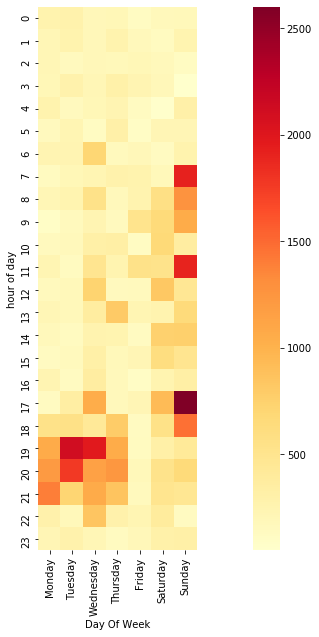

In [40]:
ax = sns.heatmap(order_data1, square = True, cmap = 'YlOrRd')
plt.show()

In [41]:
start2=end1 + timedelta(hours = 1)
end2=start2 + timedelta(days=7, hours = -1)
data2 = train_hr[(train_hr.index>=start2) & (train_hr.index<=end2)]
data2

,Appliances,Day Of Week,hour of day
date,,,
2016-01-24 00:00:00,130,Sunday,0
2016-01-24 01:00:00,260,Sunday,1
2016-01-24 02:00:00,190,Sunday,2
2016-01-24 03:00:00,270,Sunday,3
2016-01-24 04:00:00,150,Sunday,4
...,...,...,...
2016-01-30 19:00:00,1090,Saturday,19
2016-01-30 20:00:00,400,Saturday,20
2016-01-30 21:00:00,580,Saturday,21


In [42]:
data2 = data2.pivot(index="hour of day", columns = "Day Of Week", values = "Appliances")
data2

Day Of Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour of day,,,,,,,
0,130,290,220,130,170,770,230
1,140,250,110,260,110,210,140
2,120,200,270,190,210,50,200
3,180,80,100,270,140,170,190
4,150,180,160,150,150,240,210
5,50,200,130,190,170,230,200
6,260,240,250,210,140,200,110
7,140,150,120,430,200,500,200
8,250,140,220,1800,100,350,180


In [43]:
order_data2 = data2.reindex(order_col, axis=1)
order_data2

Day Of Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hour of day,,,,,,,
0,290,770,230,170,130,220,130
1,250,210,140,110,140,110,260
2,200,50,200,210,120,270,190
3,80,170,190,140,180,100,270
4,180,240,210,150,150,160,150
5,200,230,200,170,50,130,190
6,240,200,110,140,260,250,210
7,150,500,200,200,140,120,430
8,140,350,180,100,250,220,1800


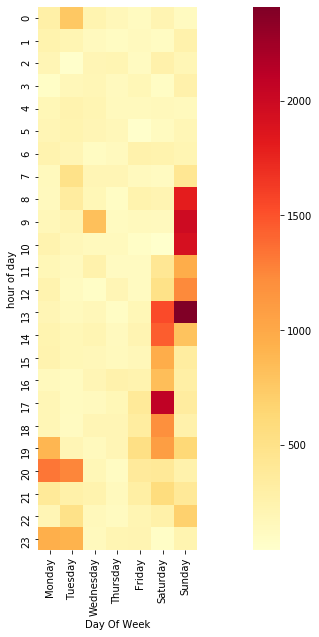

In [44]:
ax = sns.heatmap(order_data2, square = True, cmap = 'YlOrRd')
plt.show()

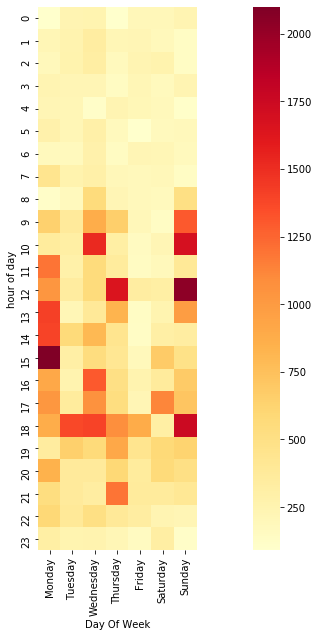

In [45]:
start3 = end2 + timedelta(hours = 1)
end3 = start3 + timedelta(days=7, hours = -1)
data3 = train_hr[(train_hr.index>=start3) & (train_hr.index<=end3)]
data3 = data3.pivot(index="hour of day", columns = "Day Of Week", values = "Appliances")
order_data3 = data3.reindex(order_col, axis=1)
ax = sns.heatmap(order_data3, square = True, cmap = 'YlOrRd')
plt.show()

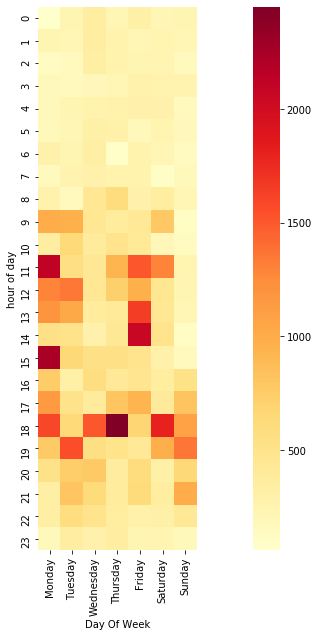

In [46]:
start4 = end3 + timedelta(hours = 1)
end4 = start4 + timedelta(days=7, hours = -1)
data4 = train_hr[(train_hr.index>=start4) & (train_hr.index<=end4)]
data4 = data4.pivot(index="hour of day", columns = "Day Of Week", values = "Appliances")
order_data4 = data4.reindex(order_col, axis=1)
ax = sns.heatmap(order_data4, square = True, cmap = 'YlOrRd')
plt.show()

The heatmaps show that they don't look the same every week, different peak hours weekly.